# Torah scraping

### Looking for hidden patterns.
### and not so hidden patterns.
### 2020-4-21
### Joe Hostyk and Alex Zaloum

In [134]:
import csv
from IPython.display import display, clear_output
import os
import itertools
from collections import defaultdict, Counter
import numpy as np

import matplotlib
# matplotlib.use('TKAgg')
import matplotlib.pyplot as plt

import spacy
import re

In [2]:
GMATRIA = {"א": 1, "ב": 2, "ג": 3, "ד": 4, "ה": 5, "ו": 6, "ז": 7, "ח": 8, "ט": 9, "י": 10, "כ": 20, "ך": 20, "ל": 30, "מ": 40, "ם": 40, "נ": 50, "ן": 50, "ס": 60, "ע": 70, "פ": 80, "ף": 80, "צ": 90, "ץ": 90, "ק": 100, "ר": 200, "ש": 300, "ת": 400}
ALEPH_BEIS = GMATRIA.keys()

### Load texts

In [3]:
def getFilePaths(folder, additionalSearch = "", hebrewOrEnglish = "Hebrew"):
    """
    Recursively go through a folder and get all file names, for processing later.

    Args:
        folder (str): Full path to the folder.
        additionalSearch (str): Optional extra term in the file name. Useful for some
            Sefaria names. For gmara, "merged.txt" seemed to be the best Hebrew version.
            For Tanach, "Text Only.txt" was a non-nekudot, good version.
        hebrewOrEnglish (str): We saved a Hebrew and English version for each sefer. The
            user can specify which to load. Defaults to Hebrew.

    Returns:
        filePaths (list of strings): 
    """

#     print ("Getting file paths...")

    filePaths = []
    for root, dirs, files in os.walk(folder):
        for file in files:
            if ".txt" in file and hebrewOrEnglish in root and additionalSearch in file:
                filePaths.append(os.path.join(root, file))
    return filePaths

def getAllTanachPaths():
    """
    Get all the links at once.

    Returns:
        tanachPaths (dict): {"Torah": [paths to Torah sfarim], "Neviyim": [...], "Ktuvim": [...]}
    """   
    
    tanachPaths = dict()
    
    sections = ["Torah", "Neviyim", "Ktuvim"]
    for section in sections:
        tanachPaths[section] = getFilePaths("Texts/{}".format(section), additionalSearch = "Text Only")

    return tanachPaths

### Intro helper functions.

In [103]:
def makeWordDictionaryFromSefer(filePath):
    
    seferWords = Counter()
    with open(filePath, "r") as psukim:
        
        ### Skip first 9 lines - metadata
        for i in range(9):
            next(psukim)
            
        for pasuk in psukim:

            cleanedPasuk = pasuk.strip().replace("־", " ").replace("[", "").replace("]", "")
            splitPasuk = cleanedPasuk.split(" ")

            # Skip the non-text lines.
            if len(splitPasuk) == 1 or splitPasuk[0] == "Chapter":
                continue

            for word in splitPasuk:
                try:
                    seferWords[word] += 1
                except KeyError as e:
                    problematicWords.add(word)
    return seferWords


def makeLetterDictionaryFromSefer(filePath, allLetters):
    
    ### Skip first 9 lines - metadata
    for i in range(9):
        next(psukim)
            
    with open(filePath, "r") as psukim:
        for pasuk in psukim:

            cleanedPasuk = pasuk.strip().replace("־", " ")
            splitPasuk = cleanedPasuk.split(" ")

            # Skip the non-text lines.
            if len(splitPasuk) == 1 or splitPasuk[0] == "Chapter":
                continue

            for word in splitPasuk:
                try:
                    for letter in word:
                        allLetters[letter] += 1
                except KeyError as e:
                    problematicWords.add(word)
    return allLetters  

def makeNgramsDictionaryFromSefer(filePath, allNgrams, sizeOfngram):

    ### Skip first 9 lines - metadata
    for i in range(9):
        next(psukim)
            
    with open(filePath, "r") as psukim:
        for pasuk in psukim:

            cleanedPasuk = pasuk.strip().replace("־", " ").replace("[", "").replace("]", "")
            splitPasuk = cleanedPasuk.split(" ")

            # Skip the non-text lines.
            if len(splitPasuk) == 1 or splitPasuk[0] == "Chapter":
                continue

            for word in splitPasuk:
                try:
                    for letterIndex in range(len(word) - sizeOfngram + 1):
    
                        ngram = word[letterIndex:letterIndex + sizeOfngram]
                        allNgrams[ngram] += 1
                except KeyError as e:
                    problematicWords.add(word)
    return allNgrams  

def getAllFiles(filePaths):
    
    allWords = {}
    allLetters = Counter()
    allNgrams = Counter()
    
    for filePath in filePaths:
        
        seferName = filePath.replace(".txt", "").split("/")[-1]
        print(seferName)
#         allWords[seferName] = makeDictionaryFromSefer(filename)
#         allLetters = makeLetterDictionaryFromSefer(filename, allLetters)
        allNgrams = makeNgramsDictionaryFromSefer(filePath, allNgrams, sizeOfngram = 2)

#         raise
    return allNgrams
        
     

In [9]:
folder = "./texts/Torah"
filePaths = getFilePaths(folder, additionalSearch = "Text Only")
# allWords = getAllFiles(filenames)
# allLetters = getAllFiles(filenames)
# allNgrams = getAllFiles(filenames)

### Check which pairs never show up in the Torah

In [69]:
allPossiblePairs = list(itertools.product(ALEPH_BEIS, ALEPH_BEIS))
allPossiblePairs = ["".join(pair) for pair in allPossiblePairs]
# allPossiblePairs

In [70]:
print([pair for pair in allPossiblePairs if pair not in allNgrams])

['בף', 'גט', 'גכ', 'גס', 'גצ', 'גץ', 'גק', 'דז', 'דט', 'דס', 'דצ', 'דץ', 'הף', 'הץ', 'זט', 'זס', 'זף', 'זצ', 'זץ', 'זש', 'חא', 'חע', 'טג', 'טז', 'טכ', 'טס', 'טצ', 'טץ', 'טק', 'כץ', 'ךא', 'ךב', 'ךג', 'ךד', 'ךה', 'ךו', 'ךז', 'ךח', 'ךט', 'ךי', 'ךכ', 'ךך', 'ךל', 'ךמ', 'ךם', 'ךנ', 'ךן', 'ךס', 'ךע', 'ךפ', 'ךף', 'ךצ', 'ךץ', 'ךק', 'ךר', 'ךש', 'ךת', 'מף', 'םא', 'םב', 'םג', 'םד', 'םה', 'םו', 'םז', 'םח', 'םט', 'םי', 'םכ', 'םך', 'םל', 'םמ', 'םם', 'םנ', 'םן', 'םס', 'םע', 'םפ', 'םף', 'םצ', 'םץ', 'םק', 'םר', 'םש', 'םת', 'ןא', 'ןב', 'ןג', 'ןד', 'ןה', 'ןו', 'ןז', 'ןח', 'ןט', 'ןי', 'ןכ', 'ןך', 'ןל', 'ןמ', 'ןם', 'ןנ', 'ןן', 'ןס', 'ןע', 'ןפ', 'ןף', 'ןצ', 'ןץ', 'ןק', 'ןר', 'ןש', 'ןת', 'סז', 'סט', 'סצ', 'סץ', 'סש', 'עח', 'עע', 'עף', 'פב', 'פפ', 'ףא', 'ףב', 'ףג', 'ףד', 'ףה', 'ףו', 'ףז', 'ףח', 'ףט', 'ףי', 'ףכ', 'ףך', 'ףל', 'ףמ', 'ףם', 'ףנ', 'ףן', 'ףס', 'ףע', 'ףפ', 'ףף', 'ףצ', 'ףץ', 'ףק', 'ףר', 'ףש', 'ףת', 'צז', 'צס', 'צש', 'ץא', 'ץב', 'ץג', 'ץד', 'ץה', 'ץו', 'ץז', 'ץח', 'ץט', 'ץי', 'ץכ', 'ץך', 'ץל', 'ץמ', 'ץם

### What are the most common pairs in the Torah?

In [71]:
allNgrams.most_common(5)

[('את', 5543), ('וי', 4352), ('אל', 4090), ('ים', 3970), ('יה', 3734)]

In [72]:
### Most common:
allNgrams.most_common(575)

### Least common:
allNgrams.most_common(575)[-30:]

[('טד', 5),
 ('סס', 5),
 ('קא', 4),
 ('כט', 4),
 ('קף', 4),
 ('זם', 4),
 ('חף', 3),
 ('א\u200d', 3),
 ('\u200dש', 3),
 ('זך', 3),
 ('שף', 3),
 ('עס', 3),
 ('זח', 3),
 ('קק', 3),
 ('אט', 3),
 ('פמ', 3),
 ('נץ', 2),
 ('תץ', 2),
 ('לץ', 2),
 ('פף', 2),
 ('זפ', 2),
 ('צץ', 2),
 ('טט', 1),
 ('אץ', 1),
 ('סן', 1),
 ('אא', 1),
 ('צט', 1),
 ('קכ', 1),
 ('הך', 1),
 ('זג', 1)]

In [131]:
# sortedLetters = {k: v for k, v in sorted(allLetters.items(), key=lambda item: item[1])}

# plt.hist(list(sortedLetters.keys()), list(sortedLetters.values()))

### Heatmap

In [ ]:
### Todo: make a heatmap of 24x24 letters


### Get gmatrias:

In [157]:
def gmatrifyAword(word):
    """
    Get the gmatria for one word. Doesn't catch punctuation/errors.

    Args:
        word (str)

    Returns:
        The gmatria (int)

    """

    return sum([GMATRIA[letter] for letter in word])


def calculateGmatriaForAsefer(seferPath):
    """
    Get the gmatria for every word in a text.

    Args:
        seferPath (str): Path to a file from Sefaria.

    """
#     print ("Gmatrifying {}...".format(seferPath))

    gmatriasToWords = defaultdict(set)
    problematicWords = set()
    with open(seferPath, "r") as psukim:
        
        ### Skip first nine lines of file - metadata.
        for i in range(9):
            next(psukim)
        for pasuk in psukim:

            cleanedPasuk = pasuk.strip().replace("־", " ").replace("\u200d", " ").replace("[", "").replace("]", "")
            splitPasuk = cleanedPasuk.split(" ")

            # Skip the non-text lines.
            if len(splitPasuk) == 1 or splitPasuk[0] == "Chapter":
                continue

            for word in splitPasuk:
                try:
                    gmatria = gmatrifyAword(word)
                    gmatriasToWords[gmatria].add(word)
                except KeyError as e:
                    print (splitPasuk)
                    problematicWords.add(word)
#     print ("Done!")
#     print ("Had trouble with:")
#     print (problematicWords)
    
    
    return gmatriasToWords

    
def writeWordsAndTheirGmatria(gmatriasToWords, outputFilePath):
    """
    Write out our results.

    Args:
        gmatriasToWords (defaultdict(set)): {Gmatria1 (int): {word1withThatGmatria, word2, ...}, ...}
        outputFilePath (str): Path to write to.
    """

    writer = csv.writer(open(outputFilePath, "w"), delimiter = "\t")
    writer.writerow(["Gmatria", "Word"])
    for gmatria, wordsWithThatGmatria in sorted(gmatriasToWords.items()):

        writer.writerow([gmatria, " | ".join(wordsWithThatGmatria)])
        
    
### todo clean this up - either calculating, or reading.
def getAllGmatrias():
    
    gmatriasToWordsForTanach = defaultdict(dict)

    tanachPaths = getAllTanachPaths()    

    
    ### Sections are Torah, Neviyim, Ktuvim
    for section, seferPaths in tanachPaths.items():
        
        gmatriasToWordsForSefer = defaultdict(dict)

        
        for seferPath in seferPaths:
            seferName = seferPath.split("/")[2]
            

            pathToGmatriaFile = "Gmatria/{}GmatriaByNumber.tsv".format(seferName)

            if os.path.exists(pathToGmatriaFile):
#                 print ("Gmatria file exists. Reading...")
                reader = csv.reader(open(pathToGmatriaFile), delimiter = "\t")
                header = next(reader)
                for line in reader:
                    line = dict(zip(header, line))
                    word = int(line["Gmatria"])
                    shifts = set(line["Word"].split(" | "))
                    gmatriasToWords[word] = shifts
#                 print ("Finished reading.")
            else:
#                 print ("Gmatria file does not exist. Creating...")
                gmatriasToWords = calculateGmatriaForAsefer(seferPath)
                writeWordsAndTheirGmatria(gmatriasToWords, outputFilePath = pathToGmatriaFile)


            
    return gmatriasToWords

In [159]:
getAllGmatrias()

In [ ]:
def analyzeGematria(gmatriasToWords):
    """
    Analysis.

    Args:
        gmatriasToWords (defaultdict(set)): {Gmatria1 (int): {word1withThatGmatria, word2, ...}, ...}
        originalFilename (str): The text from which the Gmatria dict was made.
    """

    print ("The largest gmatrias:")

    for gmatria, wordsWithThatGmatria in gmatriasToWords.items():

        if len(wordsWithThatGmatria) > 20:

            print ("Gmatria {} has words: {}".format(gmatria, wordsWithThatGmatria))

In [5]:
gmatriasToWords = getAllGmatrias()
gmatriasToWords[220]

Gmatria file exists. Reading...
Finished reading.


{'הארדי', 'וטהר', 'וידר', 'וירד', 'ורוח', 'טהור', 'יבחר', 'צפים', 'רוחו'}

## Unique words

In [104]:
tanachPaths = getAllTanachPaths()

sfarimToWords = {} ### Dict of dicts
sfarimToSizeOfSefer = dict() ### dict of {seferName: int}
### Sections are Torah, Neviyim, Ktuvim
for section, sectionPaths in tanachPaths.items():
    for seferPath in sectionPaths:

        seferName = seferPath.split("/")[2]
    #     print(seferName)
        wordsInSefer = makeWordDictionaryFromSefer(seferPath)
        sfarimToWords[seferName] = wordsInSefer
        sfarimToSizeOfSefer[seferName] = sum(wordsInSefer.values())

In [105]:
### Write out most common per sefer

amountToWrite = 20
outputFilePath = "MostCommonWordsBySefer.tsv"
header = ["Sefer"] + [str(i) for i in range(1, amountToWrite + 1)]
writer = csv.writer(open(outputFilePath, "w"), delimiter = "\t")
writer.writerow(header)

for sefer, counts in sfarimToWords.items():
    
    topCounts = counts.most_common(amountToWrite)
    topWords = [word for word, count in topCounts]
    writer.writerow([sefer] + topWords)


In [106]:
### Get counts per word, across all of Tanach

wordsToTanachCounts = Counter()
wordsToNumberOfSfarimTheyAppearIn = Counter()

for seferName, seferToWords in sfarimToWords.items():
        
    for word, wordCounts in seferToWords.items():
        
        wordsToTanachCounts[word] += wordCounts
        wordsToNumberOfSfarimTheyAppearIn[word] += 1

In [84]:
torahSfarim = set(["Breishit", "Shmot", "Vayikra", "Bamidbar", "Dvarim"])
for sefer in torahSfarim:

    seferWords = set(sfarimToWords[sefer])
    print ("{} has {} words.".format(sefer, len(seferWords)))

combos = itertools.combinations(torahSfarim, 2)
for sefer1, sefer2 in combos:

    sefer1words = set(sfarimToWords[sefer1])
    sefer2words = set(sfarimToWords[sefer2])

    print ("{} and {} share {} words.".format(sefer1, sefer2, len(sefer1words.intersection(sefer2words))))
#     print ("{} has {} unique words.".format(sefer1, len(sefer1words.difference(sefer2words))))
#     print ("{} has {} unique words.".format(sefer2, len(sefer2words.difference(sefer1words))))


Dvarim has 4093 words.
Bamidbar has 3851 words.
Vayikra has 2714 words.
Shmot has 4175 words.
Breishit has 5011 words.
Dvarim and Bamidbar share 1205 words.
Dvarim and Vayikra share 862 words.
Dvarim and Shmot share 1306 words.
Dvarim and Breishit share 1317 words.
Bamidbar and Vayikra share 977 words.
Bamidbar and Shmot share 1416 words.
Bamidbar and Breishit share 1327 words.
Vayikra and Shmot share 1011 words.
Vayikra and Breishit share 864 words.
Shmot and Breishit share 1486 words.


In [85]:
print ("There are {} total words in Tanach.".format(sum(wordsToTanachCounts.values())))

There are 307084 total words in Tanach.


__Current Scoring System:__

For a group of N documents/sfarim:

    Let U be the union of all words in these sfarim
    Let I be the intersection
    
    For each word in I:
        Let T be how often that word shows up in all of Tanach


        Let S be the amount of minimum amount of times this word shows up in each sefer.
            This is the relative shared amount of the word?
        
    Then the score is (S/T) * N / U
    
    
  
     amountShared = min([sfarimToWords[sefer][word] for sefer in listOfSfarim])
    score += amountShared/tanachOccurences


    ### Normalize:
    
    ## Divide by the total words across all the sfarim, to penalize larger sfarim.
    totalWords = len(unionWords)
    
    
    ### Multiply by number of sfarim so that the perfect score can be 1.
    numberOfSfarim = len(listOfSfarim)
    score = score * numberOfSfarim / totalWords


Scenarios for our scoring system:

__Starting:__

1: aaaab -> ab<br>
2: abbb -> ab<br>
3: aaaac -> ac

totals: a: 9, b: 4, c: 1

compare 1 and 3:<br>
1/9 * 4 = 16/36

compare 1 and 2:<br>
1/9 + 1/4 = 13/36

compare 2 and 3:<br>
1/9 = 4/36


compare 1, 2, and 3:<br>
1/9 = 4/36

__Rare words?__

a is super common: 2500<br>
b is semi common: 500<br>
c is rare: 2<br>

1: a * 750, b * 249, c * 1<br>
2: a* 999, c * 1<br>
3: a * 750, b * 250


compare 1 and 2:<br>
750/2500 + 1/2

compare 1 and 3:<br>
750/2500, 250/500

__Problem with larger sfarim?__

1: 5000 as, 1 c<br>
2: 1a, 1b, 1c<br>
3: 1b, 1c<br>
4: 2500 as, 2500 bs

In [86]:
### This counts each word once.

def compareSfarimNaive(listOfSfarim):
    
    unionWords = set()
    intersectionWords = set(sfarimToWords[listOfSfarim[0]])
    
    for sefer in listOfSfarim:
        
        seferWords = set(sfarimToWords[sefer])
        
        unionWords |= seferWords
        intersectionWords &= seferWords
        
    total = len(unionWords)
    shared = len(intersectionWords)
    sharedPercentage = float(shared) / total * 100
    print ("There are {} unique words across the {} sfarim.".format(total, len(listOfSfarim)))
    print ("They share {} of them ({:.2f} percent).".format(shared, sharedPercentage))
    
    ### Weighted shared percentage:
    
    individualSharedPercentages = {}
    
    for sefer in listOfSfarim:
        
        seferWords = set(sfarimToWords[sefer])
        sefersSharedWordsWithAllOtherSfarim = seferWords.intersection(intersectionWords)
        
        sefersSharedPercentage = float(len(sefersSharedWordsWithAllOtherSfarim)) / len(seferWords)
        
        individualSharedPercentages[sefer] = sefersSharedPercentage
    
    meanSharedPercentage = 100 * sum(individualSharedPercentages.values())/len(individualSharedPercentages)
    print ("The average shared percentage is {:.2f}.".format(meanSharedPercentage))
    
    for sefer in listOfSfarim:
        
        print ("{}: {:.2f}".format(sefer, 100*individualSharedPercentages[sefer]))
        
            

In [191]:
### This uses the Alex Joe weighting system (ie tf=idf?)

def compareSfarimScoring(listOfSfarim):
    
    unionWords = set()
    intersectionWords = set(sfarimToWords[listOfSfarim[0]])
    numberOfSfarimInTanach = len(sfarimToWords)
    numberOfSfarimInThisSet = len(listOfSfarim)
    

    for sefer in listOfSfarim:
        
        seferWords = set(sfarimToWords[sefer])
        
        intersectionWords &= seferWords
        
    ### Calculate score:
    score = 0
    for word in intersectionWords:
        
        numberOfSfarimThisWordAppearsIn = wordsToNumberOfSfarimTheyAppearIn[word]
        
        tanachOccurences = float(wordsToTanachCounts[word])
        
        
        amountShared = min([sfarimToWords[sefer][word] / np.log(sfarimToSizeOfSefer[sefer]) for sefer in listOfSfarim])
        
        ### Maybe weight/ multiply the idf by a scaling factor?
        idf = np.log(numberOfSfarimInTanach / numberOfSfarimThisWordAppearsIn)
        
#         score += amountShared/tanachOccurences
#         score += amountShared/numberOfSfarimThisWordAppearsIn
        score += amountShared * idf
        

    ### Normalize:
    
    ## Divide by the total words across all the sfarim, to penalize larger sfarim.
    totalWords = sum([sfarimToSizeOfSefer[sefer] for sefer in listOfSfarim])

    
    ### Multiply by number of sfarim so that the perfect score can be 1.
    score = score * numberOfSfarimInThisSet / totalWords
    
    return score

In [192]:
compareSfarimScoring(["Bamidbar", "Dvarim"])

0.09219429204471698

In [167]:
### todo: 
### change weighting to not favor bigger sefers. divide by the union
    ### to check that we've removed that bias, plot average score per sefer, versus its size, to make sure
    ### not correlated.
### all pairwise comparisons
### pinwheel visualization - pick the sfarim you want, shows score in middle
### Change weightings to bring in ngrams: right now we've done 1-word comparisons. add in 
### weightings of n-grams of 2, then n-grams of 3.
### Is this just a plagiarism detector? Let's code next time and see.

In [193]:
### All comparisons
sfarimNames = sfarimToWords.keys()
combos = itertools.combinations(sfarimNames, 2)
scores = defaultdict(dict)
for sefer1, sefer2 in combos:
    
#     print (sefer1, sefer2)
    score = compareSfarimScoring([sefer1, sefer2])
    
    scores[(sefer1, sefer2)] = score
    scores[(sefer2, sefer1)] = score   

In [194]:
### Highest scores:
topScores = sorted(scores.items(), key = lambda sefer: sefer[1], reverse = True)
print("Top scores:", topScores[:10:2])
print("Bottom scores:", topScores[-10::2])


Top scores: [(('I Kings', 'II Chronicles'), 0.18812657649592282), (('Ezra', 'Nehemiah'), 0.18387993217610032), (('II Kings', 'II Chronicles'), 0.15923858097448412), (('I Samuel', 'II Samuel'), 0.15779185246722202), (('I Kings', 'II Kings'), 0.15640112036033604)]
Bottom scores: [(('Obadiah', 'II Chronicles'), 0.00609234547648764), (('Shmot', 'Obadiah'), 0.005512926970922008), (('Bamidbar', 'Obadiah'), 0.0054090621022245145), (('Breishit', 'Obadiah'), 0.005329106693265538), (('Vayikra', 'Obadiah'), 0.004725239042564009)]


In [36]:
outputFileName = "sfarimComparisons.tsv"
with open(outputFileName, "w") as out:
    
    out.write("Sefer1\tSefer2\tScore\n")
    skipDuplicate = True ### Because we did symmetrical tuples)
    for (sefer1, sefer2), score in sorted(scores.items(), key = lambda sefer: sefer[1], reverse = True):
        
        if skipDuplicate:
            
            out.write("{}\t{}\t{}\n".format(sefer1, sefer2, score))
        skipDuplicate = not skipDuplicate

#### Histogram of scores

Text(0, 0.5, 'Number of Sfarim With This Score')

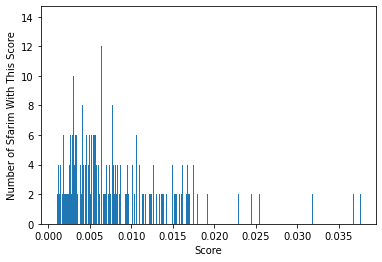

In [169]:
plt.figure()
plt.hist(scores.values(), bins = len(scores))
plt.xlabel("Score")
plt.ylabel("Number of Sfarim With This Score")

#### Confirm no correlation with sefer size

In [195]:
### Get sizes per pair
sfarimPairsToSizes = dict()
for (sefer1, sefer2) in scores:
    
    sizeOfPair = sfarimToSizeOfSefer[sefer1] + sfarimToSizeOfSefer[sefer2]
    sfarimPairsToSizes[(sefer1, sefer2)] = sizeOfPair


In [196]:
assert(len(scores) == len(sfarimPairsToSizes))

In [197]:
sortedPairs = sorted(scores)
scoresSortedBySeferPair = [score for sfarimPair, score in sorted(scores.items())]
sizesSortedBySeferPair = [score for sfarimPair, score in sorted(sfarimPairsToSizes.items())]

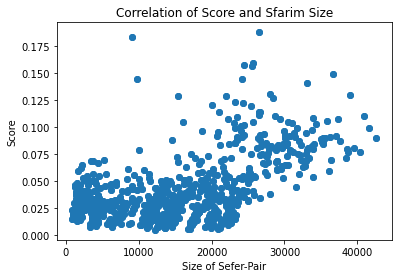

<Figure size 432x288 with 0 Axes>

In [198]:
plt.figure()
plt.scatter(sizesSortedBySeferPair, scoresSortedBySeferPair)
plt.xlabel("Size of Sefer-Pair")
plt.ylabel("Score")
plt.title("Correlation of Score and Sfarim Size")
plt.show()
plt.savefig("Normalized_ModelScoreSizeCorrelation.png")
x = True

### Motzaot HaPeh
מוצאות הפה

The 5 Organs of Articulation.

Tnuyot Haotiyot
תנועות האותיות

(From [here](https://www.inner.org/gematria/5origins.php).)

Todo: vowels/non-matres lectiones

In [6]:
## Define the motzaot categories
motzaotToLetters = {}
motzaotToLetters["throat"] = {"א","ח", "ה", "ע"}
motzaotToLetters["palate"] = {"כ","י", "ג", "ק", "ך"}
motzaotToLetters["tongue"] = {"ר" ,"ס", "ש", "ז", "צ", "ץ"}
motzaotToLetters["teeth"] = {"נ" ,"ל", "ט", "ד", "ת", "ן"}
motzaotToLetters["lips"] = {"פ" ,"מ", "ו", "ב", "ם", "ף"}

lettersToMotzaot = {}
for organ, letters in motzaotToLetters.items():
    
    for letter in letters:
        lettersToMotzaot[letter] = organ
        
# motzaotToKey = {"throat": "t", "palate": "p", "tongue": "g", "teeth": "e", "lips": "l"}

In [14]:
def convertWordToMotzaot(word):
    
#     convertedWord = [motzaotToKey[lettersToMotzaot[letter]] for letter in word]
    convertedWord = [lettersToMotzaot[letter] for letter in word]
    ### Change from list to string:
    convertedWord = "".join(convertedWord)
    return convertedWord

In [41]:
def makeDictionariesFromSefer(filename, allWords, allLetters):
    
    problematicWords = set()
    
    with open(filename, "r") as psukim:
        for pasuk in psukim:

            cleanedPasuk = pasuk.strip().replace("־", " ").replace("[", "").replace("]", "")
            splitPasuk = cleanedPasuk.split(" ")

            # Skip the non-text lines.
            if len(splitPasuk) == 1 or splitPasuk[0] == "Chapter":
                continue

            for word in splitPasuk:
                try:
                    ### Change to motzaot:
                    convertedWord = convertWordToMotzaot(word)
                    allWords[convertedWord] += 1
                    
                    for letter in convertedWord.split("_"):
                        allLetters[letter] += 1                    
                except KeyError as e:
                    problematicWords.add(word)
    return allWords, allLetters


def makeNgramsDictionaryFromSefer(filename, allNgrams, sizeOfngram):
    
    problematicWords = set()
    
    with open(filename, "r") as psukim:
        for pasuk in psukim:

            cleanedPasuk = pasuk.strip().replace("־", " ").replace("[", "").replace("]", "")
            splitPasuk = cleanedPasuk.split(" ")

            # Skip the non-text lines.
            if len(splitPasuk) == 1 or splitPasuk[0] == "Chapter":
                continue

            for word in splitPasuk:
                try:
                    
                    convertedWord = convertWordToMotzaot(word).split("_")
                    
                    for letterIndex in range(len(convertedWord) - sizeOfngram + 1):
                        
    
                        ngram = "_".join(convertedWord[letterIndex:letterIndex + sizeOfngram])
                        allNgrams[ngram] += 1
                except KeyError as e:
                    problematicWords.add(word)
    return allNgrams  

def runOnWholeTorah(seferFilenames):
    
    allWords = Counter()
    allLetters = Counter()
    allNgrams = Counter()
    
    for seferFilename in seferFilenames:
        
        seferName = seferFilename.replace(".txt", "").split("/")[-1]
        print(seferName)
        allWords, allLetters = makeDictionariesFromSefer(seferFilename, allWords, allLetters)
        allNgrams = makeNgramsDictionaryFromSefer(seferFilename, allNgrams, sizeOfngram = 3)

    return allWords, allLetters, allNgrams

     

In [42]:
folder = "./texts/Torah"
seferFilenames = getFilePaths(folder)
allWords, allLetters, allNgrams = runOnWholeTorah(seferFilenames)


Getting filenames...
vayikra
dvarim
breishit
shmot
bamidbar


In [35]:
allLetters.most_common(5)

[('lips', 76863),
 ('throat', 73615),
 ('teeth', 62542),
 ('palate', 50390),
 ('tongue', 41753)]

In [38]:
allWords.most_common(5)


[('lips_palate_tongue_tongue_palate_throat_teeth', 1),
 ('teeth_lips_throat_palate_teeth_lips', 1),
 ('lips_throat_palate_tongue_palate_teeth_lips', 1),
 ('lips_teeth_teeth_lips_tongue_lips', 1),
 ('palate_throat_teeth_lips_teeth_lips', 1),
 ('teeth_throat_teeth_palate_lips_lips', 1),
 ('teeth_lips_teeth_teeth_palate_lips', 1),
 ('lips_lips_teeth_throat_teeth_teeth', 1),
 ('lips_teeth_throat_palate_palate_teeth_throat', 1),
 ('teeth_teeth_palate_throat_teeth', 1)]

In [44]:
allNgrams.most_common()[-10:]

[('tongue_tongue_teeth', 274),
 ('lips_lips_lips', 256),
 ('tongue_teeth_teeth', 249),
 ('tongue_teeth_tongue', 244),
 ('teeth_tongue_tongue', 211),
 ('teeth_teeth_tongue', 154),
 ('throat_throat_throat', 146),
 ('palate_throat_throat', 125),
 ('palate_palate_palate', 78),
 ('tongue_tongue_tongue', 69)]

### Basic histogram/breakdowns:
    
#### Letters, pairs of letters

In [ ]:
allWords
for 

# Talmud

In [14]:
## Load:
folder = "texts/Talmud"
masechetFilenames = getFilePaths(folder, hebrewOrEnglish = "English")
print ("There are {} masechtot.".format(len(masechetFilenames)))

Getting filenames...
There are 37 masechtot.


In [32]:
# yikes
def masechetFromFilename(masechetFilename):
    
    splitName = masechetFilename.split("/")
    nextIndex = splitName.index("English")
    masechetName = splitName[nextIndex - 1]
    
    return masechetName

Ran the spaCy code below to get all people in the Talmud. That had lots of false positives (e.g. "Leviticus 8:11", "chews ginger"), so took all lines with "Rav", "Rabb", and "The" in them, to get most of the true hits.
(Missing people like "Berurya" or "Ḥoni HaMe’aggel" with this, though.)

In [86]:
rabbis = set([person.strip() for person in open("RavRabbThe.txt", "r")])
print("Working with {} rabbis from the Talmud.".format(len(rabbis)))


Working with 1666 rabbis from the Talmud.


In [67]:
nlp = spacy.load('en_core_web_sm')
lineNumber = 0
people = set()
rabbisToMasechet = defaultdict(Counter)
masechetToRabbis = defaultdict(Counter)

for filename in masechetFilenames:
    
    masechetName = masechetFromFilename(filename)
    print ("\r{}\r".format(masechetName))
    reader = open(filename, "r")
    for line in reader:
        
        ### Skip the header info, and the whitespace/daf numbers
        lineNumber += 1
        if lineNumber < 21 or len(line) < 13:
            continue
        line = re.sub('<[^<]+?>', '', line) # ayy https://stackoverflow.com/a/4869782

        ### Incredible https://spacy.io/usage/linguistic-features#named-entities
        doc = nlp(line)            
        for entity in doc.ents:
            
            ### First pass: get all the people (lots of false positives):
#             if entity.label_ == "PERSON" and entity.text in rabbis:
#                 people.add(entity)
                
            ### Next round: use that to make an edited list:
            if entity.label_ == "PERSON" and entity.text in rabbis:
                rabbisToMasechet[entity.text][masechetName] += 1
                masechetToRabbis[masechetName][entity.text] += 1

Niddah
Chagigah
Yoma
Rosh Hashanah
Moed Katan
Beitzah
Sukkah
Megillah
Taanit
Pesachim
Shabbat
Eruvin
Berakhot
Horayot
Avodah Zarah
Bava Batra
Shevuot
Sanhedrin
Bava Metzia
Bava Kamma
Makkot
Sotah
Kiddushin
Nazir
Yevamot
Gittin
Ketubot
Nedarim
Zevachim
Meilah
Bekhorot
Temurah
Keritot
Menachot
Arakhin
Chullin
Tamid


In [44]:
### First round: save all the spaCy results.

# peopleToText = {name.text for name in people}
# with open("talmudPeople.txt", "w") as out:
#     out.write("\n".join(peopleToText))

In [85]:
### Second round: save the more accurate counts.

sortedRabbis = sorted(rabbis)
with open("RabbiCounts.tsv", "w") as out:
    
    masechtot = sorted(masechetToRabbis)
    out.write("\t{}\n".format("\t".join(masechtot)))
    
    for rabbi in sortedRabbis:
        
        rabbiCounts = rabbisToMasechet[rabbi]
        sortedCounts = [str(rabbiCounts[masechet]) for masechet in masechtot]
        
        out.write("{r}\t{c}\n".format(r = rabbi, c = "\t".join(sortedCounts)))

### Exact Matching (without spaCy)

Alternative (quicker) way that doesn't use spaCy, so it doesn't do true entity recognition and just searches for any matches. Runs instantly, but counts "Rav" a bunch because it counts "Rav x" for Rav as well.

In [68]:
# rabbisToMasechet = defaultdict(Counter)
# masechetToRabbis = defaultdict(Counter)

# for filename in masechetFilenames:
        
#     masechetName = masechetFromFilename(filename)
#     print ("\r{}\r".format(masechetName))
#     with open(filename, "r") as masechet:
        
#         text = masechet.read()
#         for rabbi in rabbis:
#             appearances = text.count(rabbi)
            
#             if appearances != 0:
#                 rabbisToMasechet[rabbi][masechetName] += appearances
#                 masechetToRabbis[masechetName][rabbi] += appearances
                            

In [84]:
### Big to print
# print(rabbisToMasechet)
# print(masechetToRabbis)

Exploratory:

In [78]:
def formattedCounts(counts):
    
    formatted = "\t" + "; ".join(["{}: {}".format(value, count) for value, count in counts])
    return formatted
    
rabbi = "Rabbi Yehuda"
masechet = "Berakhot"
### Most common:

print("{}'s most common:\n".format(rabbi), formattedCounts(rabbisToMasechet[rabbi].most_common(5)))
print("{}'s most common:\n".format(masechet), formattedCounts(masechetToRabbis[masechet].most_common(5)))
print()

### Least common:

print("{}'s least common:\n".format(rabbi), formattedCounts(rabbisToMasechet[rabbi].most_common()[-5:]))
print("{}'s least common:\n".format(masechet), formattedCounts(masechetToRabbis[masechet].most_common()[-10:]))

Rabbi Yehuda's most common:
 	Shabbat: 446; Pesachim: 409; Chullin: 406; Eruvin: 395; Menachot: 322
Berakhot's most common:
 	Rabbi Yoḥanan: 292; Rabbi Yehuda: 222; Rav: 219; Rava: 122; Rabbi Yosei: 110

Rabbi Yehuda's least common:
 	Horayot: 48; Rosh Hashanah: 40; Chagigah: 37; Meilah: 16; Tamid: 2
Berakhot's least common:
 	Rav Sama: 1; Rabbi Yosei bar Yehuda: 1; Rabbi Parnakh: 1; Rav Huna bar Berekhya: 1; Rabbi Elazar HaKappar: 1; Rabbi Yosei ben Keifar: 1; Zekharya ben Kevutal: 1; Zekharya ben: 1; the Sages of the Mishna: 1; Rav Yehuda bar Zevida: 1


Full counts across the whole Talmud:

In [79]:
rabbisFullCounts = Counter()

for rabbi, masechetCounts in rabbisToMasechet.items():
    
    masechetTotalCounts = sum(masechetCounts.values())
    rabbisFullCounts[rabbi] += masechetTotalCounts

In [80]:
rabbisFullCounts.most_common(30)

[('Rabbi Yoḥanan', 6473),
 ('Rabbi Yehuda', 6335),
 ('Rav', 5819),
 ('Rabbi Shimon', 3915),
 ('Rabbi Meir', 3756),
 ('Rabbi Yosei', 3589),
 ('Rabbis', 3552),
 ('Rava', 3507),
 ('Rabbi Eliezer', 3123),
 ('Rabbi Yehuda HaNasi', 3079),
 ('Rabbi Akiva', 2926),
 ('Rabbi Elazar', 2712),
 ('Rav Huna', 2481),
 ('Rav Yehuda', 2432),
 ('Rav Ashi', 2241),
 ('Rav Pappa', 2027),
 ('Rav Yosef', 1965),
 ('Rav Ḥisda', 1742),
 ('Rabba', 1664),
 ('Rabbi Yishmael', 1583),
 ('Rabbi Ḥiyya', 1421),
 ('Rabbi Yehoshua', 1344),
 ('Rabbi Ḥanina', 1171),
 ('Rabbi Zeira', 1148),
 ('Rav Sheshet', 1029),
 ('Rabban Gamliel', 848),
 ('Rav Kahana', 764),
 ('Shimon ben Gamliel', 717),
 ('Ravina', 699),
 ('Rabbi Yehoshua ben Levi', 685)]